<a href="https://colab.research.google.com/github/james-lucius/qureca_ADEQUATE/blob/main/M9_2221_QNNs_2_2_1_Training_a_QNN_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://gitlab.com/qworld/qeducation/educational-materials/adequate-qbook1/raw/main/qworld/images/adq_1.png" align="left" width=450>

_prepared by Claudia Zendejas-Morales_

### 2.2.1 Training a QNN Exercises

##### <font color="#08b806">Please run the following (hidden) cell; it is required to set up the environment for Google Colab

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

SolutionToTask1  = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1zw8DxGNh2flwX2RPuoplvDv_aq2GSBlN#scrollTo=rwSvtAttCdSn' if in_colab() else 'QNNs - 2.2.1 Training a QNN Exercises Solutions.ipynb#task1')))
SolutionToTask21 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1zw8DxGNh2flwX2RPuoplvDv_aq2GSBlN#scrollTo=-9VbuS_BbFYX' if in_colab() else 'QNNs - 2.2.1 Training a QNN Exercises Solutions.ipynb#task21')))
SolutionToTask22 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1zw8DxGNh2flwX2RPuoplvDv_aq2GSBlN#scrollTo=7XwlGikVdTmt' if in_colab() else 'QNNs - 2.2.1 Training a QNN Exercises Solutions.ipynb#task22')))
SolutionToTask23 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1zw8DxGNh2flwX2RPuoplvDv_aq2GSBlN#scrollTo=Jt-F9ii-e9Hy' if in_colab() else 'QNNs - 2.2.1 Training a QNN Exercises Solutions.ipynb#task23')))
SolutionToTask24 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1zw8DxGNh2flwX2RPuoplvDv_aq2GSBlN#scrollTo=2-70FlJSgujk' if in_colab() else 'QNNs - 2.2.1 Training a QNN Exercises Solutions.ipynb#task24')))
SolutionToTask25 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1zw8DxGNh2flwX2RPuoplvDv_aq2GSBlN#scrollTo=mzYrQ4wNlsom' if in_colab() else 'QNNs - 2.2.1 Training a QNN Exercises Solutions.ipynb#task25')))
SolutionToTask26 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1zw8DxGNh2flwX2RPuoplvDv_aq2GSBlN#scrollTo=QE-oNPiysGma' if in_colab() else 'QNNs - 2.2.1 Training a QNN Exercises Solutions.ipynb#task26')))

if in_colab():
    !pip install qiskit[visualization]==1.4.2 &> /dev/null # use "&> /dev/null" so that the standard output of the installation is not displayed
    !pip install qiskit-machine-learning==0.8.2 &> /dev/nul

import warnings
warnings.filterwarnings("ignore")

## Task 1

At the end of section "2.2 Training a QNN," we reviewed a very simple example that started in state |0> and aimed to end in state |1> with a single rotation around the y-axis. To achieve this, a single parameter was optimized.

Create a cost function to find the parameter needed to move from state $|0\rangle$ to state $|-i\rangle$ (along the negative _y-axis_).

To test your cost function, copy the code from section "2.2 Training a QNN," but now pass your new function as a parameter to `minimize`, and use `initial_guess = 0`.

You can use the same code from the def `average_cost(angle, fn_costo, shots=2000)` function, just copy it.

In [3]:
def cost_state_minus_i(prob_meas_state_minus_i):
  ### your code goes here
  return (prob_meas_state_minus_i - 0.5) ** 2

In [5]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from math import radians, degrees

def average_cost(angle, fn_costo, shots = 2000):
  qc = QuantumCircuit(1)
  qc.ry(radians(angle[0]), 0)
  sv = qi.Statevector(qc)
  counts = sv.sample_counts(shots = shots)
  average_state_1 = (counts['1'] if '1' in counts else 0) / shots
  average_cost = fn_costo(average_state_1)
  print(f"Try angle: {angle} produces an average cost = {average_cost}")
  return average_cost

In [6]:
from scipy.optimize import minimize
initial_guess = 0

### your code goes here
result = minimize(average_cost, initial_guess, args = (cost_state_minus_i,), method = 'Powell')

Try angle: [0.] produces an average cost = 0.25
Try angle: [0.] produces an average cost = 0.25
Try angle: [1.] produces an average cost = 0.25
Try angle: [2.618034] produces an average cost = 0.24950025
Try angle: [5.23606803] produces an average cost = 0.248004
Try angle: [9.47213609] produces an average cost = 0.24354225
Try angle: [16.32623825] produces an average cost = 0.22752899999999998
Try angle: [27.41640858] produces an average cost = 0.190096
Try angle: [45.36068124] produces an average cost = 0.11662225000000002
Try angle: [74.3951245] produces an average cost = 0.018225
Try angle: [172.70195562] produces an average cost = 0.24552025000000005
Try angle: [111.94499156] produces an average cost = 0.03609999999999998
Try angle: [88.73789702] produces an average cost = 0.00024025000000000042
Try angle: [89.97710232] produces an average cost = 0.00032400000000000056
Try angle: [87.85051805] produces an average cost = 0.0008702500000000016
Try angle: [177.47579404] produces an a

Corroborate the result with the help of a Bloch sphere, similar to the example shown in section 2.2.

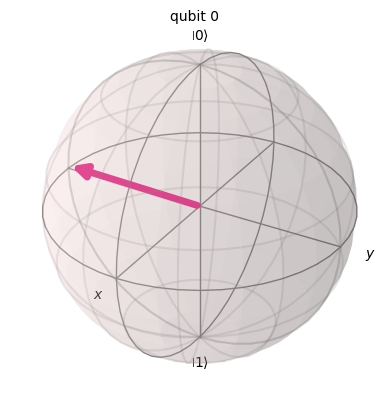

In [7]:
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(1)
qc.rx(radians(result.x[0]), 0)
sv = qi.Statevector(qc)
plot_bloch_multivector(sv)

To check out our solution, run the next cell:

In [2]:
SolutionToTask1()  # show solution for task 1

<IPython.core.display.Javascript object>

## Task 2: Regression


We'll be using [Qiskit Machine Learning](https://qiskit-community.github.io/qiskit-machine-learning/) for the following tasks. The initial cell has already taken care of installing this library, so we only need to import what's necessary.

**Qiskit Machine Learning** introduces fundamental computational building blocks, such as quantum kernels and quantum neural networks, which are used in various applications, including classification and regression.

This library provides several classes to help us solve problems with classification and regression models, such as [NeuralNetworkClassifier](https://qiskit-community.github.io/qiskit-machine-learning/stubs/qiskit_machine_learning.algorithms.NeuralNetworkClassifier.html) and [NeuralNetworkRegressor](https://qiskit-community.github.io/qiskit-machine-learning/stubs/qiskit_machine_learning.algorithms.NeuralNetworkRegressor.html). Both classes take a [NeuralNetwork](https://qiskit-community.github.io/qiskit-machine-learning/stubs/qiskit_machine_learning.neural_networks.NeuralNetwork.html) object as input and use it depending on the specific context.

We will work with a regression exercise: we will use our dataset, generating random numbers around a sine function (samples) so that our regression results behave exactly like a sine.

The code that does this is as follows:

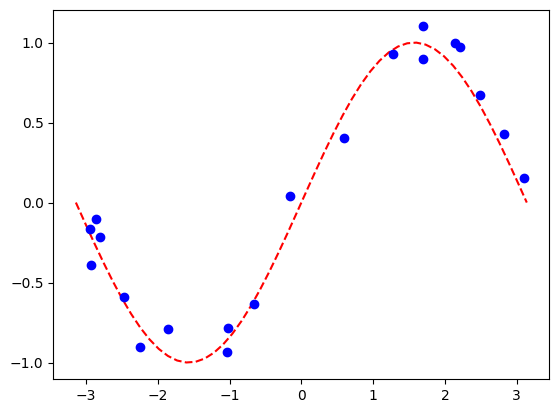

In [8]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 20                                           # number of samples to train the QNN

eps = 0.2                                                  # tolerance value (epsilon)

lb, ub = -np.pi, np.pi                                     # lower and upper limits for x

X_ = np.linspace(lb, ub, num=50).reshape(50, 1)            # generate 50 numbers in the range (lb, ub) to plot f

f = lambda x: np.sin(x)                                    # lambda function that calculates the sine

X = (ub - lb)*np.random.rand(num_samples, 1) + lb          # generate 20 samples randomly (num_samples)
                                                           # but in the interval (lb, ub)

y = f(X[:,0]) + eps*(2*np.random.rand(num_samples)-1)      # generate the results (vector 'y') randomly
                                                           # but following a sine function, and with tolerance of 'eps'
                                                           # that is, ± 0.2 above or below the sine function

plt.plot(X_, f(X_), 'r--')                                 # plot the function f (sine), using the 50 points in X_
plt.plot(X, y, 'bo')                                       # plot the samples
plt.show()

Now we are going to build our QNN.

### Task 2.1: Feature Map

Create a feature map that is a quantum circuit with a single gate $R_y$ on a single qubit, since we only have one feature for each sample (the value $x$).

We need to make $R_y$'s angle argument to be a parameter, by using Qiskit's [Parameter](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.Parameter) class. Name it `"x"`. Visit the link to see how.

In [10]:
## your code goes here
from qiskit.circuit import Parameter

# create a Parameter named 'x'
param_x = Parameter("x")

# create a circuit for the feature map
feature_map = QuantumCircuit(1, name = "fm")

# add the parameterized ry gate
feature_map.ry(param_x, 0)

To check out our solution, run the next cell:

In [ ]:
SolutionToTask21()  # show solution for task 2.1

### Task 2.2: Variational Form

Create a variational form (or ansatz) that is a quantum circuit with a single gate $R_y$ on a single qubit, since we only have one parameter $\theta$ to optimize for each sample.

We need to make $R_y$'s angle argument to be a parameter, by using Qiskit's [Parameter](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.Parameter) class. Name it `"theta"`. Visit the link to see how.

In [11]:
## your code goes here

# create a Parameter named 'theta'
param_theta = Parameter("theta")

# create a circuit for the ansatz
ansatz = QuantumCircuit(1, name = "vf")

# add the parameterized ry gate
ansatz.ry(param_theta, 0)

To check out our solution, run the next cell:

In [ ]:
SolutionToTask22()  # show solution for task 2.2

### Task 2.3: Full Quantum Circuit

Create a single circuit containing both the variational form and the ansatz, remember the `compose()` method. Display it with `draw()`.

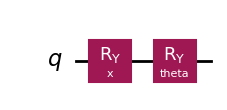

In [12]:
## your code goes here

# create a QuantumCircuit
qc = QuantumCircuit(1)
qc.compose(feature_map, inplace = True)
qc.compose(ansatz, inplace = True)
qc.draw('mpl')

To check out our solution, run the next cell:

In [ ]:
SolutionToTask23()  # show solution for task 2.3

### Task 2.4: QNN

Create a QNN using the [EstimatorQNN](https://qiskit-community.github.io/qiskit-machine-learning/stubs/qiskit_machine_learning.neural_networks.EstimatorQNN.html) class provided by Qiskit Machine Learning.

This class expects a quantum circuit containing both a variational form and an ansatz. Additionally, the parameters for each must be explicitly specified using the arguments `input_params` and `weight_params`, respectively. Visit the link to see how.

In [14]:
## your code goes here
from qiskit_machine_learning.neural_networks import EstimatorQNN

# create a EstimatorQNN
qnn = EstimatorQNN(
    circuit = qc,
    input_params = feature_map.parameters,
    weight_params = ansatz.parameters
)

To check out our solution, run the next cell:

In [ ]:
SolutionToTask24()  # show solution for task 2.4

### Task 2.5: Regressor

Create a basic quantum neural network regressor using the [NeuralNetworkRegressor](https://qiskit-community.github.io/qiskit-machine-learning/stubs/qiskit_machine_learning.algorithms.NeuralNetworkRegressor.html) class provided by Qiskit Machine Learning. This is necessary to specialize the QNN for our type of problem: regression.

- The main argument is the object containing the QNN, sent through the `neural_network` variable.

- You can specify the loss function with the `loss` argument; the default value is `'squared_error'`, but you can experiment with others.

- Using the optimizer argument, you specify a class with which you want to train the QNN. First, try [L_BFGS_B](https://qiskit-community.github.io/qiskit-machine-learning/stubs/qiskit_machine_learning.optimizers.L_BFGS_B.html) (Limited-memory BFGS Bound), and if you wish, experiment with other [optimizers](https://qiskit-community.github.io/qiskit-machine-learning/apidocs/qiskit_machine_learning.optimizers.html). Optimizers have their own parameters that you can experiment with.

- An optional but very useful argument is `callback`, in which you can specify a function to be executed as the training progresses. Below is a function (`callback_plot`) that plots the progress of the cost function value. Include it when creating the `NeuralNetworkRegressor`.

In [19]:
from IPython.display import clear_output, display
import time

objective_func_vals = []                              # to store the full history

def callback_plot(weights, obj_func_eval):
  plt.clf()
  objective_func_vals.append(obj_func_eval)
  plt.title("Loss function value versus iteration")
  plt.xlabel("Iteration")
  plt.ylabel("Loss")
  plt.plot(range(len(objective_func_vals)), objective_func_vals)
  display(plt.gcf())
  clear_output(wait=True)
  time.sleep(1)                                       # to reduce the speed of the plot updates

In [20]:
## your code goes here
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor
from qiskit_machine_learning.optimizers import L_BFGS_B

# create a NeuralNetworkRegressor
regressor = NeuralNetworkRegressor(
    neural_network = qnn,
    loss = "squared_error",
    optimizer = L_BFGS_B(),
    callback = callback_plot,
)

To check out our solution, run the next cell:

In [ ]:
SolutionToTask25()  # show solution for task 2.5

### Task 2.6: Training

Train the regressor by calling the `NeuralNetworkRegressor.fit()` method, which receives the samples (`X`) and labels (`y`).

Check how well the model performed by calling the `NeuralNetworkRegressor.score()` method, using the same `X` and `y`.

0.9716140444152431

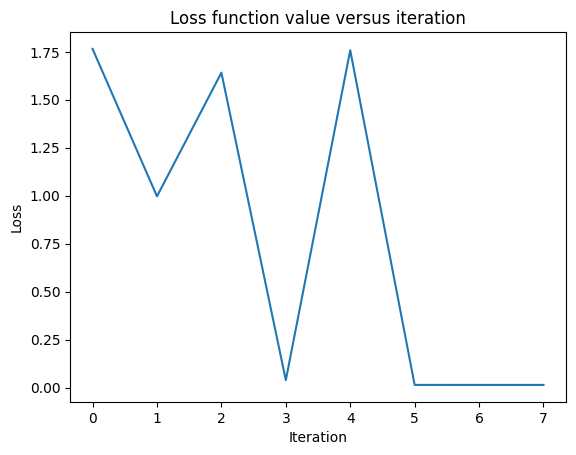

In [22]:
## your code goes here
objective_func_vals = []
regressor.fit(X, y)
regressor.score(X, y)

To check out our solution, run the next cell:

In [ ]:
SolutionToTask26()  # show solution for task 2.6

---

Finally, let's look at the result of the regressor with the help of the `NeuralNetworkRegressor.predict()` method to observe the function it fitted.

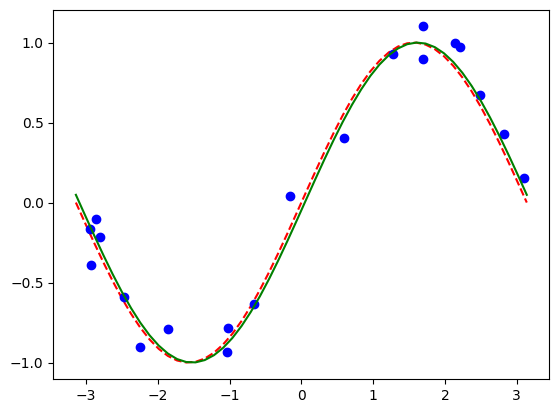

In [23]:
plt.plot(X_, f(X_), "r--")          # plot the original function (in red)

plt.plot(X, y, "bo")                # plot the samples (in blue)

y_ = regressor.predict(X_)          # suppose the NeuralNetworkRegressor object was created in the variable 'regressor'

plt.plot(X_, y_, "g-")              # plot the fitted curve (in green)
plt.show()